# Crime Incidents

by: Seamus Quigley, SJQ6@pitt.edu

Batman needs lots of villains to fight so this notebook will be looking at crime incidents reported in Pittsburgh!

First im going to import pandas into this notebook.


In [1]:
import pandas as pd
# imports pandas library

read in the file, and drop all rows that return null.

In [2]:
crime = pd.read_csv('crime.csv')
# Drop the missing values rows
crime = crime.dropna()


this filters out incident neighborhoods that do not have a lot of information and prints a smaller sample size of the total csv file. 

In [3]:
def filter_popular(x, threshold):
    return (x['HIERARCHY'].count() >= threshold)


popular_crime = crime.groupby("INCIDENTNEIGHBORHOOD").filter(lambda x: x["HIERARCHY"].count() >= 1000)
# look at what centers are in the data now
popular_crime.groupby("INCIDENTNEIGHBORHOOD").count()
popular_crime.head()

,_id,PK,CCR,HIERARCHY,INCIDENTTIME,INCIDENTLOCATION,CLEAREDFLAG,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTHIERARCHYDESC,OFFENSES,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,1,2802309,16000001.0,10,2016-01-01T00:00:00,"400 Block North Shore DR Pittsburgh, PA 15212",Y,North Shore,1,HARRASSMENT/THREAT/ATTEMPT/PHY,2702 Aggravated Assault. / 2709(a) Harassment....,2205.0,1.0,6.0,-80.012337,40.446263
2,3,2801809,16000367.0,4,2016-01-01T00:10:00,"500 Block Mt Pleasant RD Pittsburgh, PA 15214",N,Northview Heights,1,DISCHARGE OF FIREARM INTO OCC.STRUCTURE,2707.1 Discharge of a Firearm into Occupied St...,2609.0,1.0,1.0,-80.000966,40.478651
3,4,2802315,16000035.0,10,2016-01-01T00:15:00,"300 Block Wood ST Pittsburgh, PA 15222",Y,Golden Triangle/Civic Arena,2,HARRASSMENT/THREAT/ATTEMPT/PHY,2709(a)(3) Harassment No Legitimate Purpose,201.0,6.0,6.0,-80.001251,40.438918
4,5,2802312,16000024.0,4,2016-01-01T00:16:00,"500 Block Mt Pleasant RD Pittsburgh, PA 15214",N,Northview Heights,1,PROP MISSILE INTO OCC VEHICLE/OR ROADWAY,2705 Recklessy Endangering Another Person. / 3...,2609.0,1.0,1.0,-80.000966,40.478651
5,6,2802321,16000045.0,23,2016-01-01T00:24:00,"1300 Block E CARSON ST Pittsburgh, PA 15203",Y,South Side Flats,3,PUBLIC DRUNKENESS,5505 Public Drunkenness / 3503.B1I DEF. TRESPA...,1702.0,3.0,4.0,-79.985175,40.428607


In crime reports, the crime hierarchy is a ranking (1-99) which represents the severity of the incident, the lower the number the more severe the crime is. 

This prints out the average hierarchy ranking of all of the neighborhoods.

In [4]:
crime['HIERARCHY'].mean()

11.570001722059583

This adds up all of the times that a neighborhood is mentioned and prints the top 5 and bottom 5

In [5]:
count_neighbor = crime["INCIDENTNEIGHBORHOOD"].value_counts()
count_neighbor.sort_values(ascending = False)
#this is the good one dont delete

South Side Flats             8785
Central Business District    5670
Carrick                      4589
Bloomfield                   3862
Shadyside                    3412
                             ... 
Mt. Oliver Neighborhood        77
Chartiers City                 75
Mt. Oliver Boro                26
Outside State                  13
Outside County                  4
Name: INCIDENTNEIGHBORHOOD, Length: 98, dtype: int64

According to this data, the South Side Flats is the most dangerous area with 8785 incidents. 

This is a pie chart of the top 5 neighborhoods with the most crime incidents

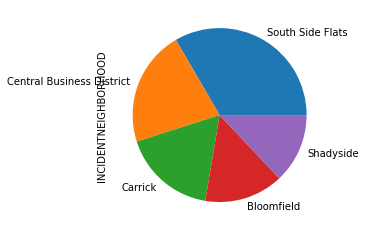

In [6]:
top_five = count_neighbor.head(5)
top_five.plot.pie(subplots=False, figsize=(8, 4))

And now a bar graph because those are fun.

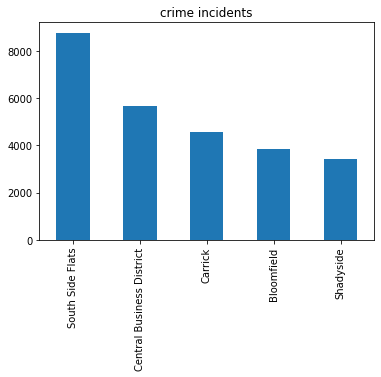

In [7]:
top_five.plot.bar(stacked=True, title="crime incidents")

Okay now lets get a little more specific, these are the top 5 addresses with the most crime incidents

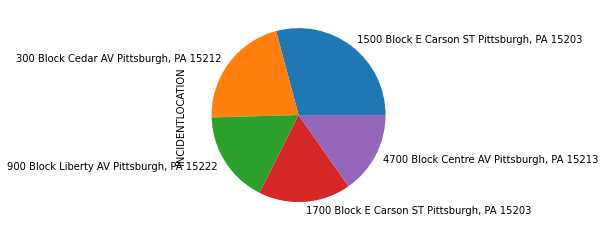

In [8]:
count_area = crime["INCIDENTLOCATION"].value_counts()
count_area.sort_values(ascending = False)
top_area = count_area.head(5)
top_area.plot.pie(subplots=False, figsize=(8, 4))

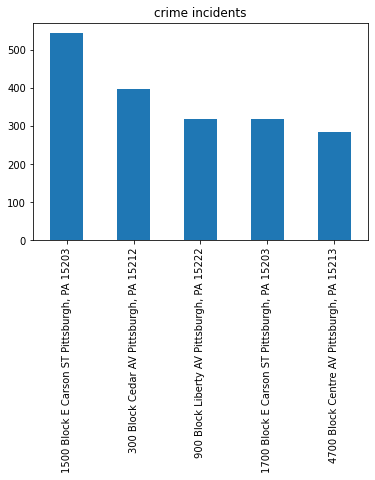

In [9]:
top_area.plot.bar(stacked=True, title="crime incidents")

Okay according to this data, the South Side Flats is the most dangerous neighborhood in pittsburgh; so it is the best neighborhood for Batman to be in. 